Unsupervised Learning Using K-means clustering.


First we import necessary libraries to facilitate K-Means Clustering. 

In [4]:
# Import necessary libraries. 
import pandas as pd #for processing datasets
import matplotlib.pyplot as plt #for data visualization

from sklearn.preprocessing import LabelEncoder #labelling
from sklearn.preprocessing import StandardScaler #scaling the dataset to facilitate unbiased KMeans. 
from sklearn.cluster import KMeans #For KMeans specific functions
from sklearn import metrics 



In [5]:
df = pd.read_csv("customer.csv") #reading a dataset that I have downloaded from kaggle and stored locally

In [ ]:
df.describe() #Studying the dataset and its components

In [7]:
s = (df.dtypes == 'object')                                 
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols) #checking for variables suitable for clustering 


Categorical variables in the dataset: ['Date', 'Customer ID', 'Gender', 'Product Category']


In [ ]:
df.head()

Labelling and scaling of the dataset is necessary to facilitate KMeans. 

In [9]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
#Features scaling
ds = df.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [ ]:
scaled_ds.head()

Following is the function that plots the elbow plot. 
An elbow plot is named so because it takes the shape of an elbow. This plot is between the number of clusters and intertia. The elbow is the point after which the difference in inertia is not very high. This tells us the exact number of clusters we should choose for optimum KMeans Clustering. 

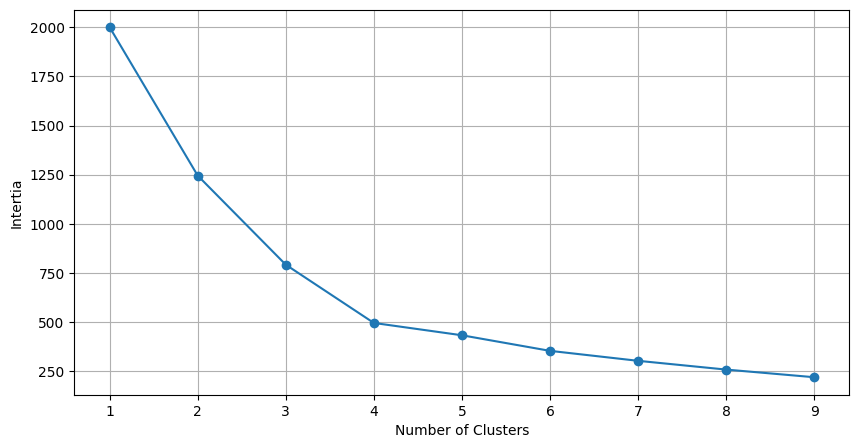

In [81]:
#functions to identify the optimum number of clusters

def opt(data, max_k):
    means = []
    intertias =[]

    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        intertias.append(kmeans.inertia_)
    
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,intertias,'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Intertia")
    plt.grid(True)
    plt.show()
opt(scaled_ds[['Date','Age']],10) 


From the elbow plot it is clearly visible that the elbow occurs at cluster 4. 
Prefered number of clusters = 4. 
I have chosen the attribute date and age for this clustering. 

In [66]:
km = KMeans(n_clusters=4)
km.fit(scaled_ds[["Date",'Age']])


KMeans(n_clusters=4)

In [ ]:
df.head()

In [ ]:
scaled_ds['km_4'] = km.labels_ #adding the cluster classification to the dataset
scaled_ds.head()

This is the end point of cluster 4's KMeans clustering where the dataset has been visualized and categorised. 

In [ ]:
plt.scatter(x=scaled_ds['Date'], y = scaled_ds['Age'],c=scaled_ds['km_4'])
plt.show()

Although, a couple more steps to verify the end point is really the most optimum output is as show below. 
We take cluster 1 to cluster 5's KMeans clustering and plot it to check for the optimized output. 

In [71]:
for k in range (1,6):
    km = KMeans(n_clusters=k)
    km.fit(scaled_ds[['Date','Age']])
    scaled_ds[f'KMeans_{k}'] = km.labels_

In [ ]:
scaled_ds.head()

This clearly shows cluster 4 is the optimum output. 

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols=5, figsize=(20,5))
for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x = scaled_ds['Date'], y = scaled_ds['Age'], c = scaled_ds[f'KMeans_{i}'])
    ax.set_title(f'Clusters Count: {i}')

In [ ]:
print(df)

From this we can derive that the retail's target crowd and how it evolved differently across the dates. 
                                                    